# CS274 Project - Concurrent AVL Implementation
### Gabriel Siqueira and Yanju Chen

## Sequential Implementation

In [1]:
from pyAVL import AVL

seqTree = AVL()

### Inserts

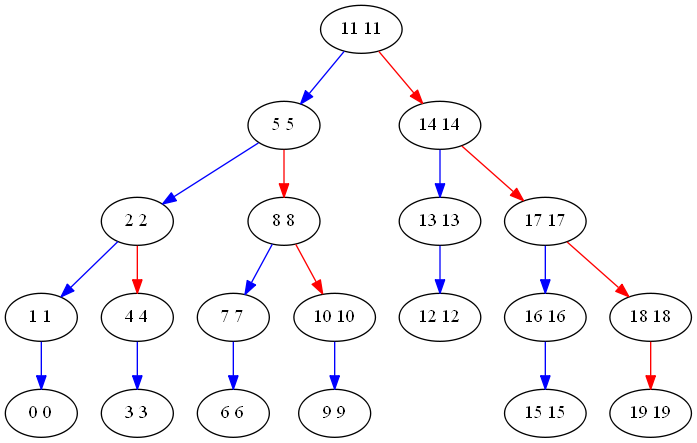

In [2]:
for i in range(20):
    seqTree.put(i)
    
seqTree.print()

### Updates

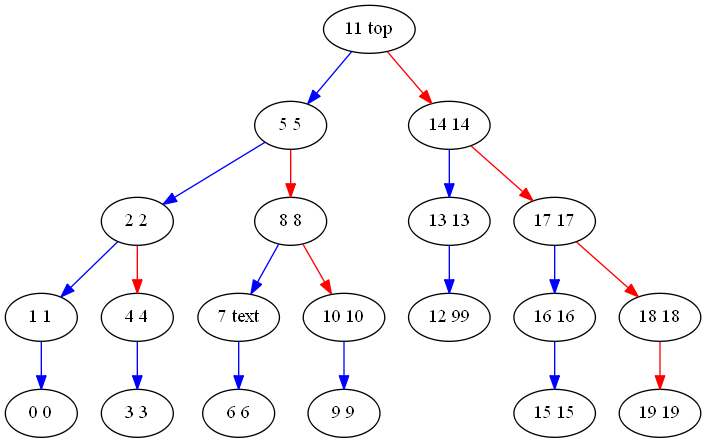

In [3]:
seqTree.put(12, "99")
seqTree.put(7, "text")
seqTree.put(11, "top")

seqTree.print()

### Removals

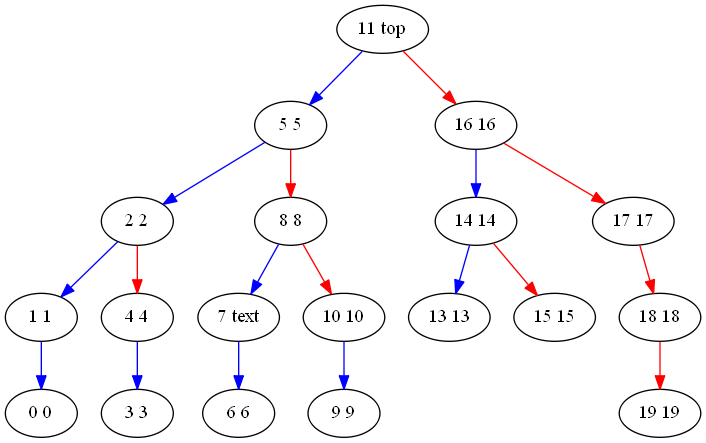

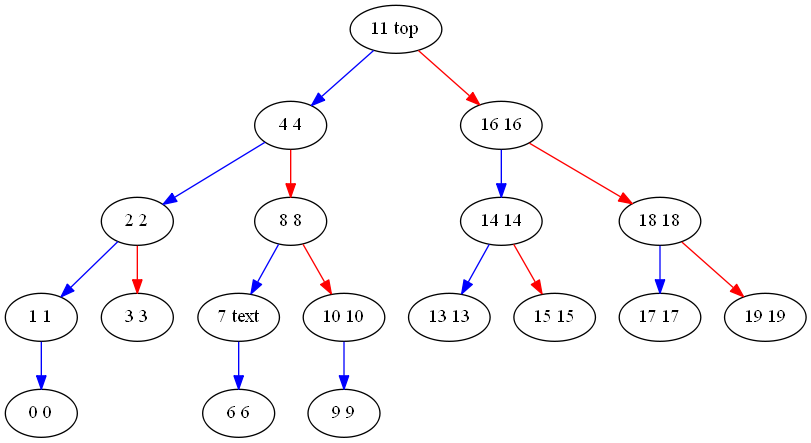

In [4]:
seqTree.remove(12)
seqTree.print()
seqTree.remove(5)
seqTree.print()

### What if we want it faster, can we use concurrency?

Exception in thread Thread-11:
Traceback (most recent call last):
  File "C:\Users\gabri\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\gabri\Anaconda3\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-5-bd230112f293>", line 6, in insert
    tree.put(i)
  File "C:\Users\gabri\PycharmProjects\pyConcurrentAVL\pyAVL.py", line 19, in put
    self.__rebalance()
  File "C:\Users\gabri\PycharmProjects\pyConcurrentAVL\pyAVL.py", line 40, in __rebalance
    self.root = self.__getRoot(self.__autoRotate(unbalanced))
  File "C:\Users\gabri\PycharmProjects\pyConcurrentAVL\pyAVL.py", line 374, in __autoRotate
    return self.__rotateRR(dnode)
  File "C:\Users\gabri\PycharmProjects\pyConcurrentAVL\pyAVL.py", line 329, in __rotateRR
    y = k2.left
AttributeError: 'NoneType' object has no attribute 'left'

Exception in thread Thread-10:
Traceback (most recent call last):
  File "C:\Users\gabri\Anaconda3\

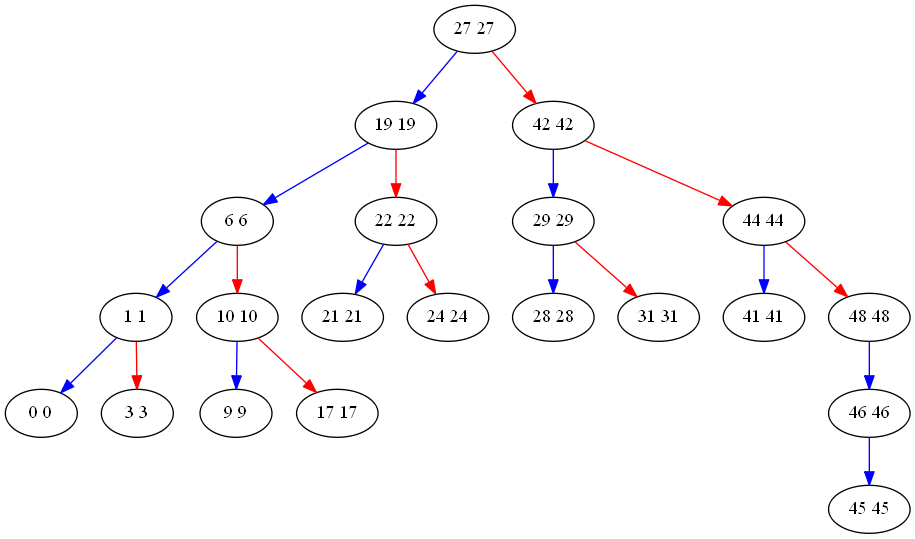

In [5]:
import random
import threading

def insert(l, tree):
    for i in l:
        tree.put(i)

ltp = random.sample(list(range(50)),k=50)

seqTree = AVL()
tpool = []
for i in range(5):
    tpool.append(threading.Thread(target=insert,args=(ltp[i*10:(i+1)*10],seqTree)))
for i in range(5):
    tpool[i].start()
for i in range(5):
    tpool[i].join()
seqTree.print()

### As we just saw, the sequential AVL implementation doesn't support concurrency. We tried using multiple threads to speed up out tree operations but many nodes were lost. The three itself wasn't left in an inconsistent state but our code ran into errors and lost a lot of information.

## Concurrent Implementation

In [6]:
from pyConAVL import ConAVL

conTree = ConAVL()

### Concurrent inserts now work well!

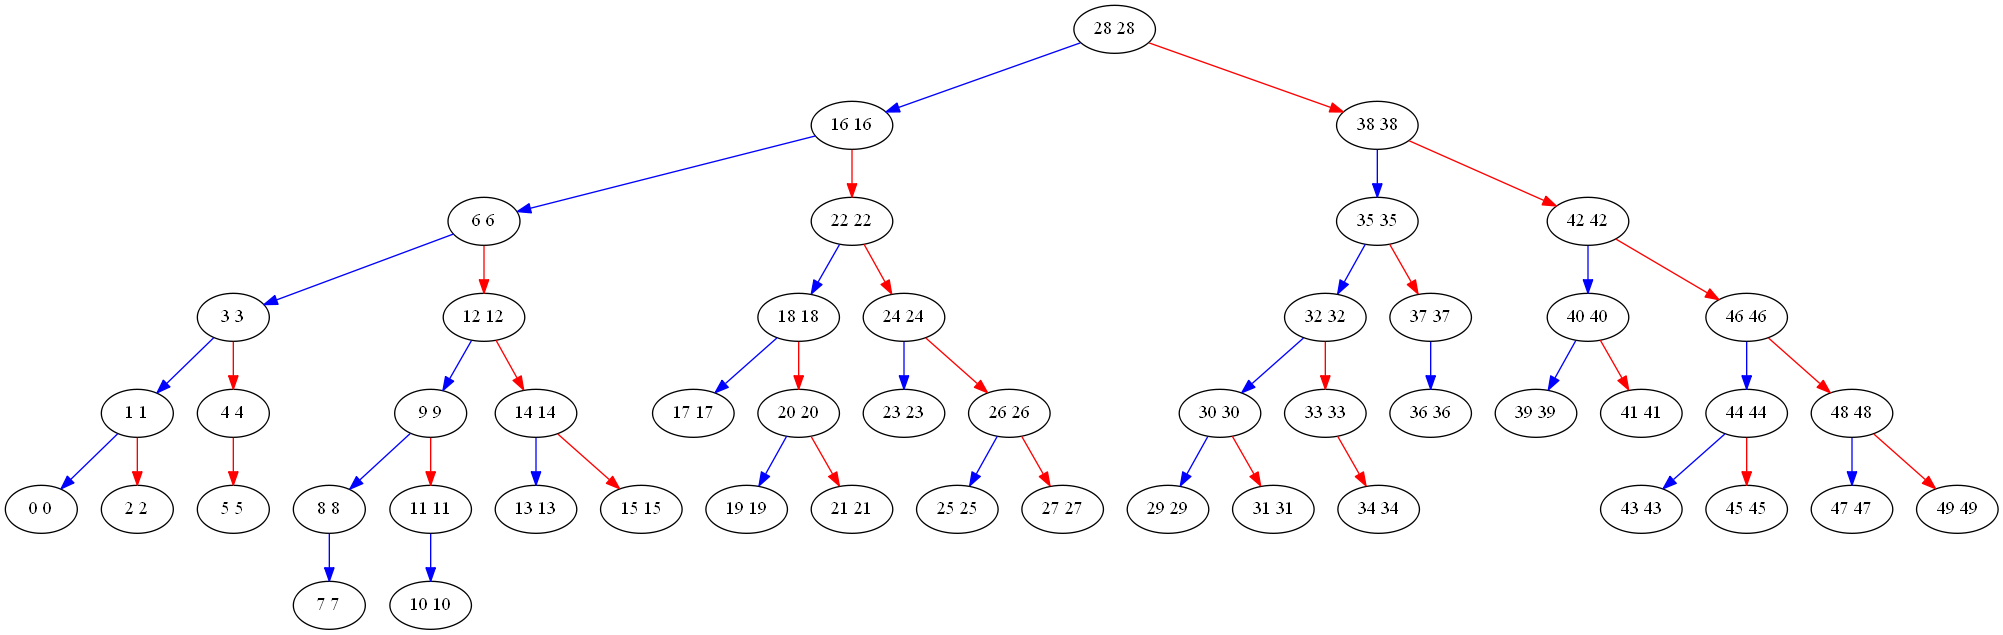

In [7]:
def insert(l, tree):
    for i in l:
        tree.put(i)

ltp = random.sample(list(range(50)),k=50)

conTree = ConAVL()
tpool = []
for i in range(5):
    tpool.append(threading.Thread(target=insert,args=(ltp[i*10:(i+1)*10],conTree)))
for i in range(5):
    tpool[i].start()
for i in range(5):
    tpool[i].join()
conTree.print()